In [2]:
#iNSTALLING DEPENDICIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import yfinance as yf



In [3]:
tickers=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol']
print(tickers)

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object


[*********************100%***********************]  1 of 1 completed
MMM


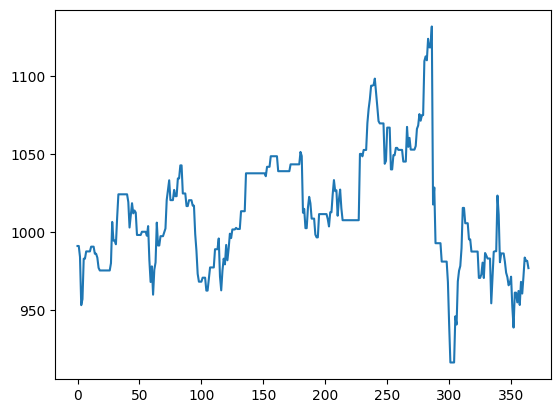

Investing Total: 659.8875901512242 -34.0%
Algo-Total: 976.9358930192514 -2.3%
[*********************100%***********************]  1 of 1 completed
AOS


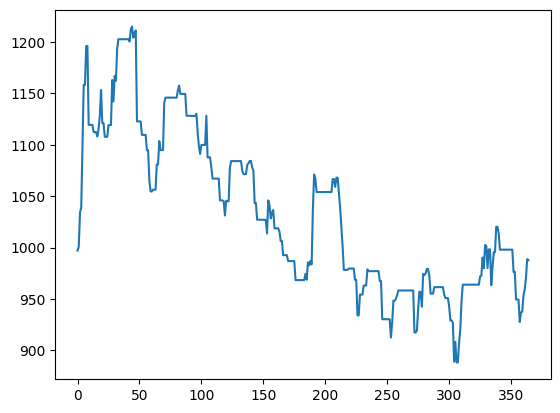

Investing Total: 1555.4047236682377 55.5%
Algo-Total: 987.861016611153 -1.2%
[*********************100%***********************]  1 of 1 completed
ABT


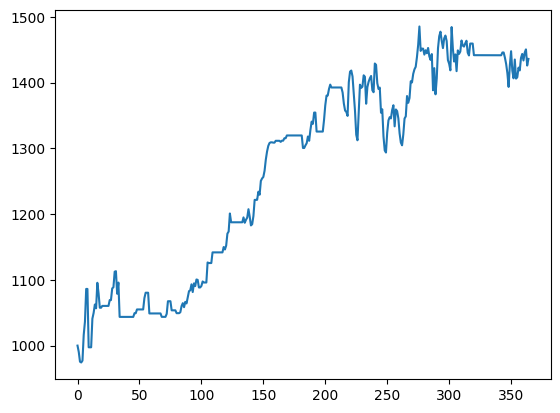

Investing Total: 1268.2871706151498 26.8%
Algo-Total: 1435.8856492156415 43.6%
[*********************100%***********************]  1 of 1 completed
ABBV


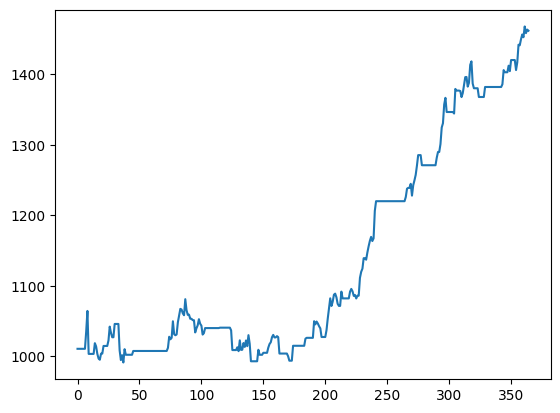

Investing Total: 1728.5015458131097 72.9%
Algo-Total: 1461.8128750533904 46.2%
[*********************100%***********************]  1 of 1 completed
ACN


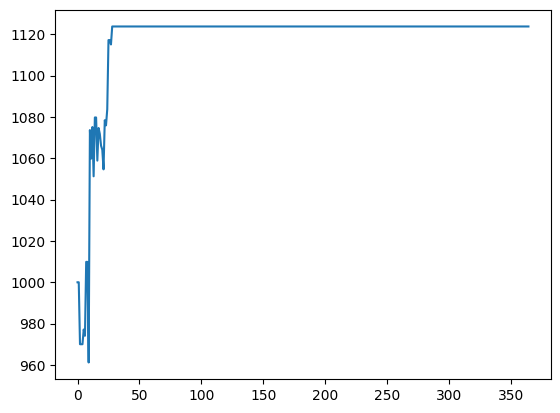

Investing Total: 1299.8259152940886 30.0%
Algo-Total: 1123.7344143367507 12.4%
[*********************100%***********************]  1 of 1 completed
ATVI


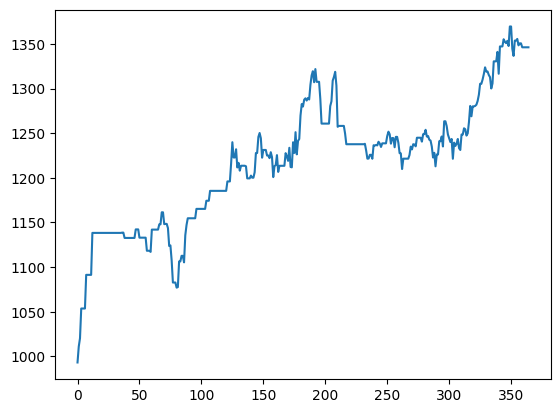

Investing Total: 1340.1754808568783 34.0%
Algo-Total: 1346.240692454316 34.6%
[*********************100%***********************]  1 of 1 completed
ADM


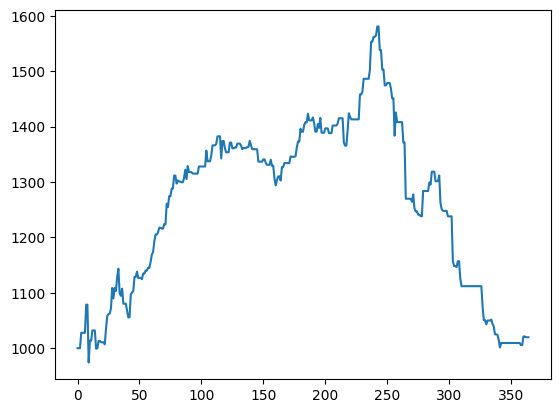

Investing Total: 1825.810835141832 82.6%
Algo-Total: 1019.7646518635814 2.0%
[*********************100%***********************]  1 of 1 completed
ADBE


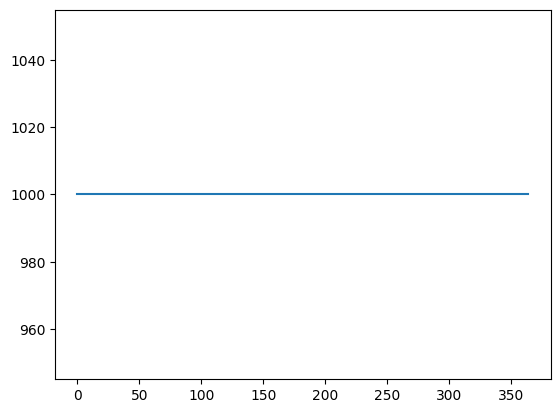

Investing Total: 999.0741876194149 -0.1%
Algo-Total: 1000 0.0%
[*********************100%***********************]  1 of 1 completed
ADP


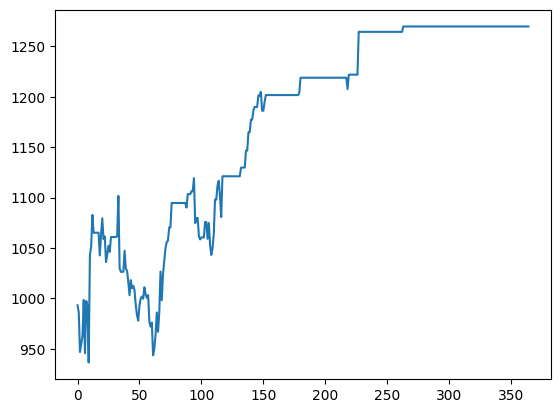

Investing Total: 1196.9410626312178 19.7%
Algo-Total: 1269.5976267381325 27.0%
[*********************100%***********************]  1 of 1 completed
AAP


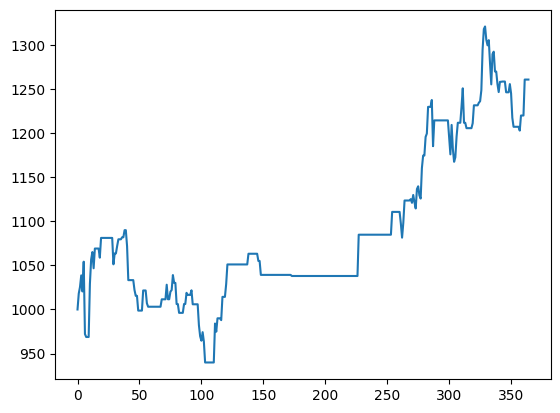

Investing Total: 905.3100630866154 -9.5%
Algo-Total: 1261.1467872984826 26.1%
[*********************100%***********************]  1 of 1 completed
AES


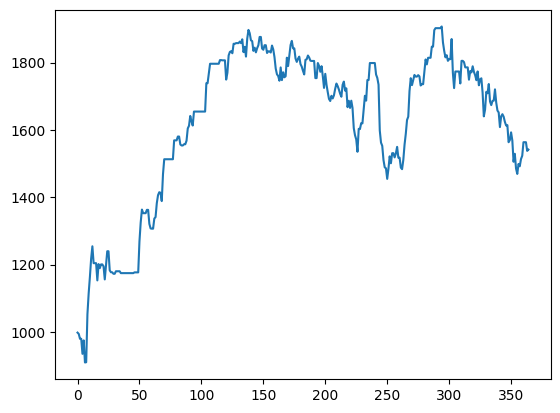

Investing Total: 1153.84619616898 15.4%
Algo-Total: 1541.5112582399297 54.2%
[*********************100%***********************]  1 of 1 completed
AFL


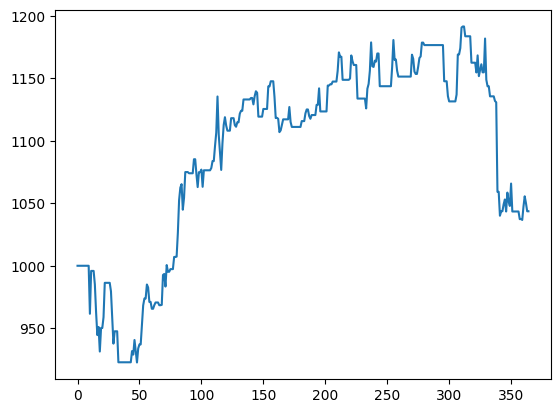

Investing Total: 1286.661562550027 28.7%
Algo-Total: 1043.6131951597886 4.4%
[*********************100%***********************]  1 of 1 completed
A


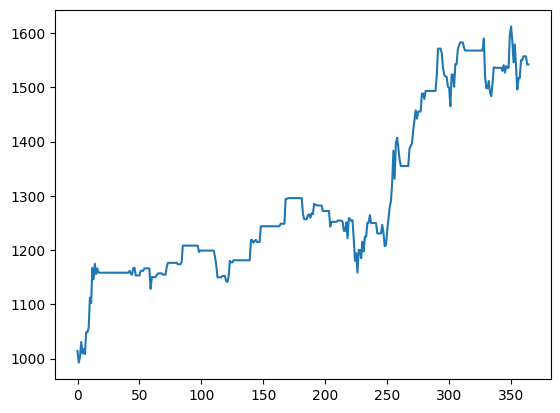

Investing Total: 1650.7747018011646 65.1%
Algo-Total: 1542.3074581514634 54.2%
[*********************100%***********************]  1 of 1 completed
APD


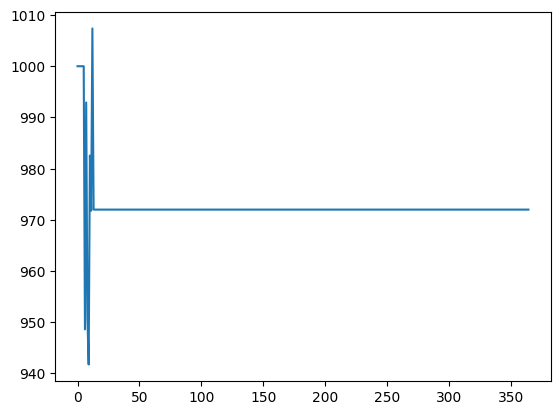

Investing Total: 1138.4187473385746 13.8%
Algo-Total: 972.0019569234549 -2.8%
[*********************100%***********************]  1 of 1 completed
AKAM


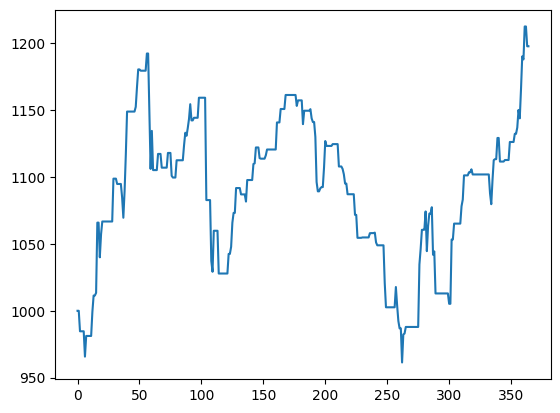

Investing Total: 798.2248641362107 -20.2%
Algo-Total: 1197.7239147928826 19.8%
[*********************100%***********************]  1 of 1 completed
ALK


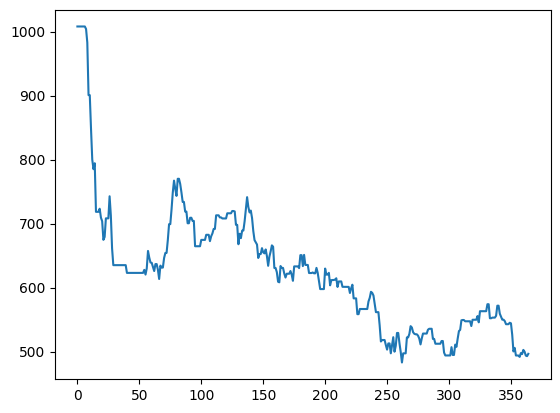

Investing Total: 684.1780517929017 -31.6%
Algo-Total: 496.3389685091783 -50.4%
[*********************100%***********************]  1 of 1 completed
ALB


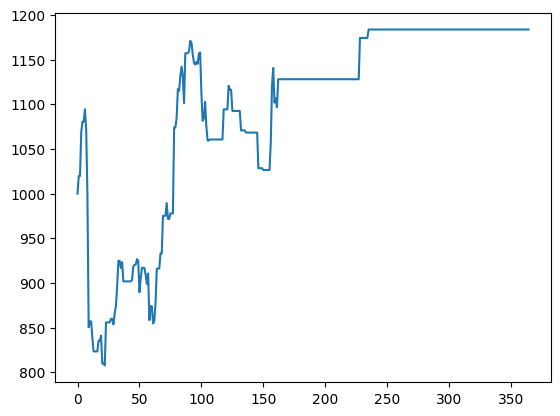

Investing Total: 1885.5127197280076 88.6%
Algo-Total: 1183.765363458677 18.4%
[*********************100%***********************]  1 of 1 completed
ARE


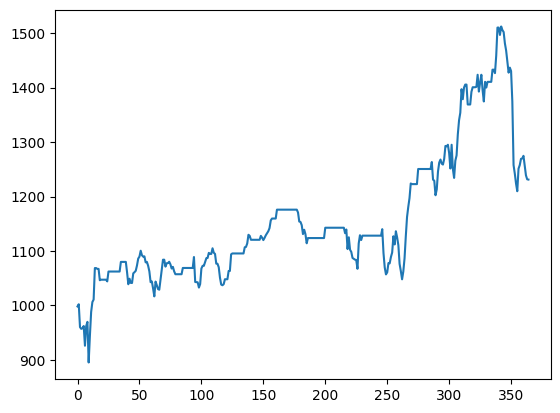

Investing Total: 739.4379191032992 -26.1%
Algo-Total: 1231.1170282508388 23.1%
[*********************100%***********************]  1 of 1 completed
ALGN


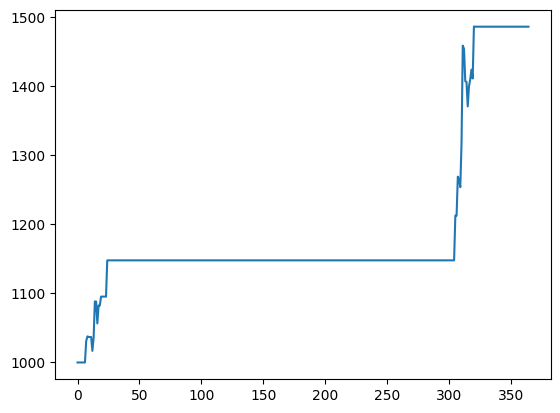

Investing Total: 1311.4476759871502 31.1%
Algo-Total: 1486.33698493837 48.6%
[*********************100%***********************]  1 of 1 completed
ALLE


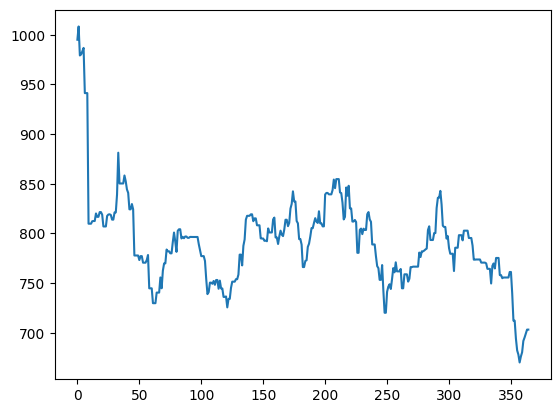

Investing Total: 796.951182145882 -20.3%
Algo-Total: 703.1515397097481 -29.7%


In [4]:
from sklearn.linear_model import LinearRegression

def test_it(opens,closes,preds,start_account=1000,thresh=0):
    account=start_account
    changes=[]
#iterating through all the predicted points (if the closing value is less than opening price the we should not be investing in that particular stoc&& if the stock giving profit more than 1% then make that trade)

    for i in range(len(preds)):
        if(preds[i]>opens[i])/opens[i]>=thresh:
            account+=account*(closes[i]-opens[i])/opens[i]
        changes.append(account)
    changes=np.array(changes)    
    plt.plot(range(len(changes)),changes)
    plt.show()


    invest_total=start_account+start_account*(closes[-1]-opens[0])/opens[0]

    print('Investing Total:',invest_total,str(round((invest_total-start_account)/start_account*100,1))+'%')
    print('Algo-Total:',account,str(round((account-start_account)/start_account*100,1))+'%')

#this function is used to check in which direction is trending in 
def calc_macd(data,len1,len2,len3):
    # emw is used to calculate the exponentially weighted moving average (EMA) of a dataset stored in the variable data

    shortEMA=data.ewm(span=len1,adjust=False).mean()
    longEMA=data.ewm(span=len2,adjust=False).mean()
    MACD=shortEMA-longEMA
    signal=MACD.ewm(span=len3,adjust=False).mean()
    return MACD,signal


#Rsi relative string index that is going to tell us that stock is overbought or oversold or not whether we should by it or sell it 
def calc_rsi(data,period):
    delta=data.diff()
    up=delta.clip(lower=0)
    down=-1*delta.clip(upper=0)
    ema_up=up.ewm(com=period,adjust=False).mean()
    ema_down=down.ewm(com=period,adjust=False).mean()
    rs=ema_up/ema_down
    rsi=100-(100/(1+rs))
    return rsi
# envelopes plotted at a standard deviation level above and below a simple moving average of the price
def calc_bollinger(data,period):
    mean=data.rolling(period).mean()
    std=data.rolling(period).std()
    upper_band=np.array(mean)+2*np.array(std)
    lower_band=np.array(mean)-2*np.array(std)
    return upper_band,lower_band
    



for ticker in tickers[0:20]:
    end_date =datetime.now()
    start_date =end_date -timedelta(days=15*365)

    history=yf.download(ticker,start=start_date,end=end_date,interval='1d',prepost=False)
    history=history.loc[:,['Open','Close','Volume']]
    
# creating new coloumn in dataset as previous Closing Price and Closing Volume
    history['Prev_Close']=history.loc[:,'Close'].shift(1)
    history['Prev_Volume']=history.loc[:,'Volume'].shift(1)

#There may be correaltion between day and week 
    datetimes=history.index.values
    weekdays=[]

    for dt in datetimes:
        dt=datetime.strptime(str(dt),'%Y-%m-%dT%H:%M:%S.000000000')
        weekdays.append(dt.weekday())

    history['weekday']=weekdays
#this coloumn is used to calculate  rolling mean SMA(simple moving average)
    history['5SMA']=history['Prev_Close'].rolling(5).mean()
    history['10SMA']=history['Prev_Close'].rolling(10).mean()
    history['20SMA']=history['Prev_Close'].rolling(20).mean()
    history['50SMA']=history['Prev_Close'].rolling(50).mean()
    history['100MA']=history['Prev_Close'].rolling(100).mean()
    history['200SMA']=history['Prev_Close'].rolling(200).mean()

    MACD,signal=calc_macd(history['Prev_Close'],12,26,9)
    history['MACD']=MACD
    history['MACD_signal']=signal

    history['RSI']=calc_rsi(history['Prev_Close'],13)
    history['RSI_Volume']=calc_rsi(history['Prev_Volume'],13)

    upper,lower = calc_bollinger(history['Prev_Close'],20)
    history['Upper_Band']=upper
    history['Lower_Band']=lower
    labels=['Prev_Close','Prev_Volume','weekday','5SMA','10SMA','20SMA','50SMA','100MA','200SMA','MACD','MACD_signal','RSI','RSI_Volume','Upper_Band','Lower_Band']
    period=1
    new_lables=[str(period)+'d_'+label for label in labels]
    history[new_lables]=history[labels].pct_change(period,fill_method='ffill')

    period=1
    new_lables=[str(period)+'d_'+label for label in labels]
    history[new_lables]=history[labels].pct_change(period,fill_method='ffill')

    period=2
    new_lables=[str(period)+'d_'+label for label in labels]
    history[new_lables]=history[labels].pct_change(period,fill_method='ffill')

    period=5
    new_lables=[str(period)+'d_'+label for label in labels]
    history[new_lables]=history[labels].pct_change(period,fill_method='ffill')

    period=10
    new_lables=[str(period)+'d_'+label for label in labels]
    history[new_lables]=history[labels].pct_change(period,fill_method='ffill')


    history=history.replace(np.inf,np.nan).dropna()



    y=history['Close']
    X=history.drop(['Close','Volume'],axis=1)

    nums_test=365
    X_train=X[:-1*nums_test]
    y_train=y[:-1*nums_test]
    X_test=X[-1*nums_test:]
    y_test=y[-1*nums_test:]

    model=LinearRegression()
    model=model.fit(X_train,y_train)
    preds=model.predict(X_test)
    

    # print(ticker)
    # plt.figure(figsize=(15,5))
    # plt.plot(range(len(y_test)),y_test,'blue')
    # plt.plot(range(len(preds)),preds,'red')
    # plt.show()

    print(ticker)
    test_it(X_test['Open'],y_test,preds,1000,0.005)

 


# x=history.index.values

# plt.figure(figsize=(15,5))
# plt.plot(x,history['Prev_Close'],color='blue')

# plt.plot(x,history['50SMA'],color='green')
# plt.plot(x,history['200SMA'],color='red')
# plt.plot(x,history['Upper_Band'],color='orange')
# plt.plot(x,history['Lower_Band'],color='orange')


#this command is use to zoom in
# plt.xlim(x[0],x[2000])
#here red line is the 200 day moving average (this is calculated using last 200 days average)

# plt.show()





#if the actual price is above the red line then stock price is trending upward
#if green line below the red line the stock benifit in long term vice versa
# plt.figure(figsize=(15,3))
# colors=np.array(['green']*len(history['MACD']))
# colors[history['MACD']<0]='red'
# plt.bar(x,history['MACD'],color=colors)
# plt.plot(x,history['MACD_signal'],color='blue')
# plt.xlim(x[0],x[1500])
# plt.show()


# plt.figure(figsize=(15,3))
# plt.plot(x,history['RSI'],color='purple')
# plt.plot([x[0],x[-1]],[80,80],color='red')
# plt.plot([x[0],x[-1]],[20,20],color='green')
# plt.xlim(x[1000],x[1500])
# plt.xlim(x[0],x[100])
# plt.show()




# display(history)

In [6]:
from joblib import dump, load

In [9]:
dump(model, 'fi.joblib')

['fi.joblib']